In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

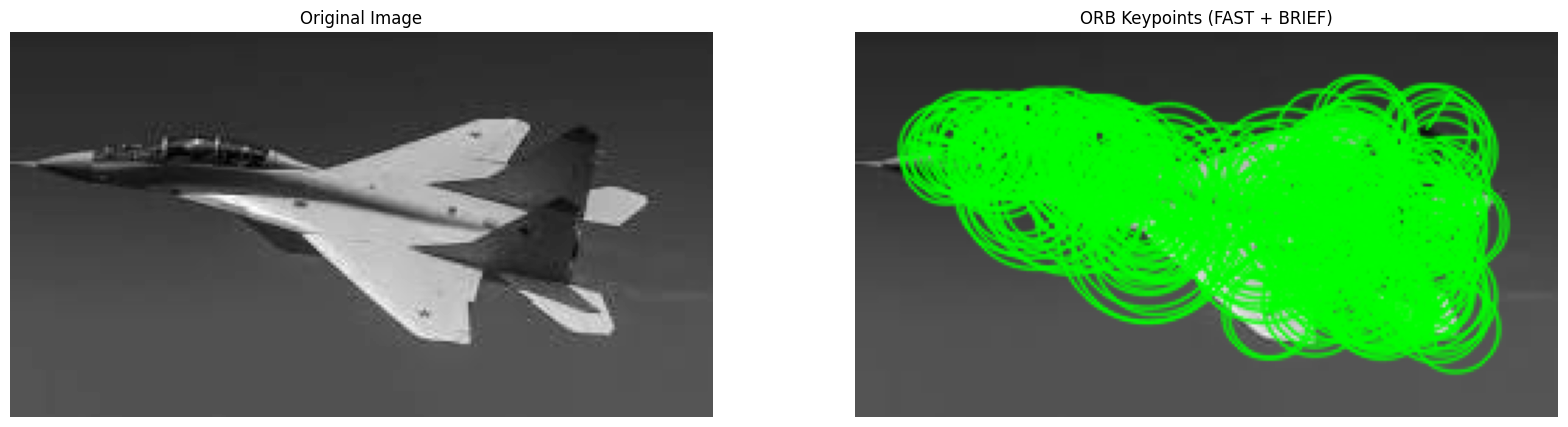

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread('/kaggle/input/plane-pic/download (3).jfif', cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Error: Image not found.")
    exit()

# Initialize ORB (which includes FAST + BRIEF internally)
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(img, None)

# Draw keypoints
img_orb = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display results
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('ORB Keypoints (FAST + BRIEF)')
plt.imshow(img_orb, cmap='gray')
plt.axis('off')

plt.show()

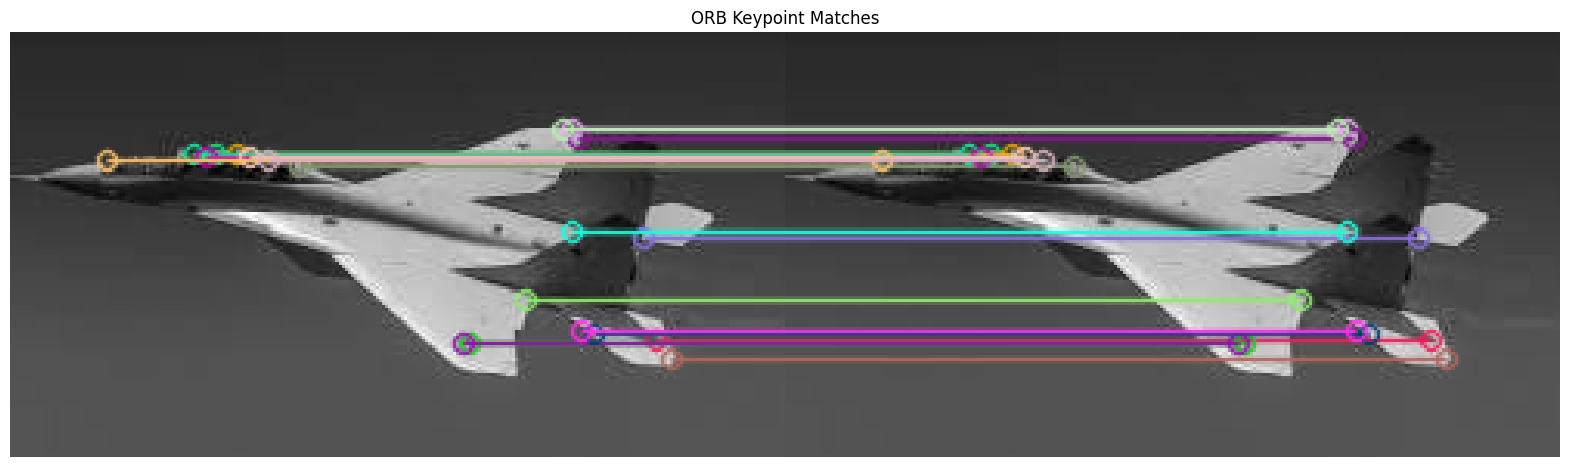

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load grayscale images
img1 = cv2.imread('/kaggle/input/plane-pic/download (3).jfif', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/kaggle/input/plane-pic/download (3).jfif', cv2.IMREAD_GRAYSCALE)
if img1 is None or img2 is None:
    print("Error: Image not found.")
    exit()

# Initialize ORB (FAST + BRIEF)
orb = cv2.ORB_create()

# Detect keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Match descriptors using Hamming distance + crossCheck
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance (best first)
matches = sorted(matches, key=lambda x: x.distance)

# Draw top 20 matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None,
                              flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Show result
plt.figure(figsize=(20, 10))
plt.title('ORB Keypoint Matches')
plt.imshow(img_matches)
plt.axis('off')
plt.show()

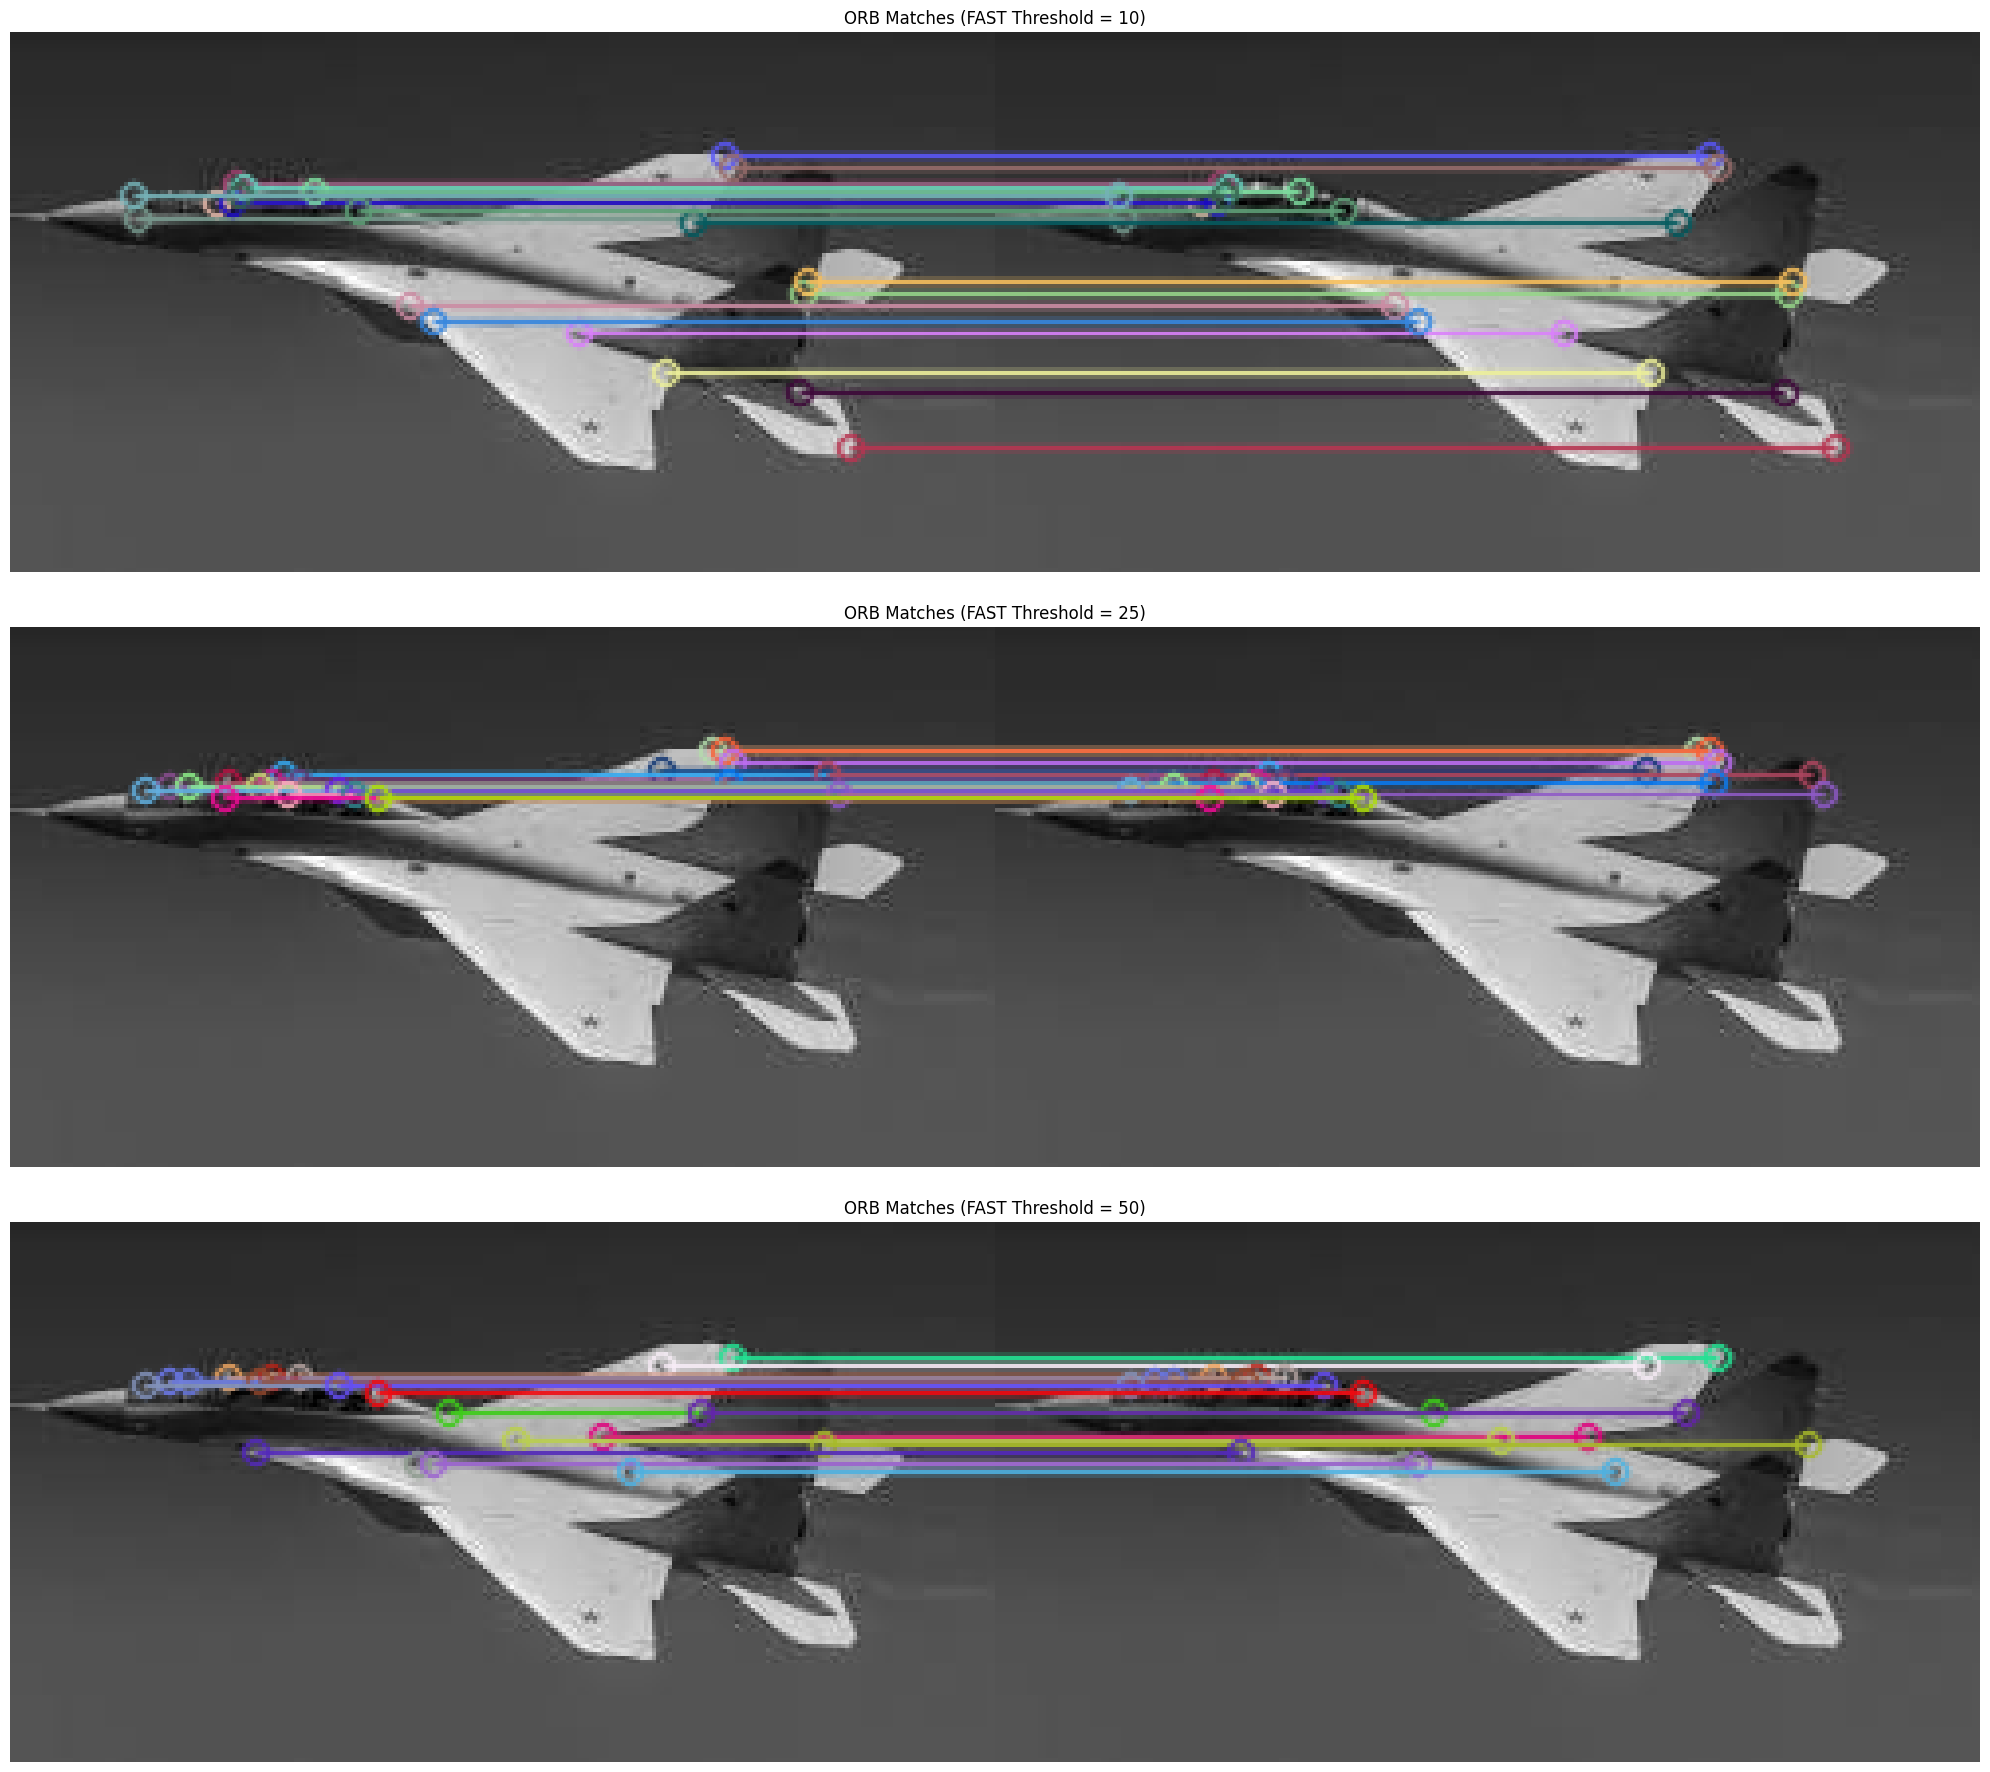

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load grayscale images
img1 = cv2.imread('/kaggle/input/plane-pic/download (3).jfif', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/kaggle/input/plane-pic/download (3).jfif', cv2.IMREAD_GRAYSCALE)
if img1 is None or img2 is None:
    print("Error: Image not found.")
    exit()

# Simulate different FAST thresholds using ORB
thresholds = [10, 25, 50]
img_matches_list = []

for thresh in thresholds:
    # Initialize ORB with different FAST thresholds
    orb = cv2.ORB_create(fastThreshold=thresh)

    # Detect keypoints and descriptors
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    # Match descriptors
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw top 20 matches
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None,
                                  flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    img_matches_list.append(img_matches)

# Display all results
plt.figure(figsize=(20, 18))
for i, thresh in enumerate(thresholds):
    plt.subplot(3, 1, i + 1)
    plt.title(f'ORB Matches (FAST Threshold = {thresh})')
    plt.imshow(img_matches_list[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()